In [61]:
import pandas as pd

#### Merging 12 months of sales data into a single file

In [65]:
import os
path = "Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/"
files = os.listdir(path)
df = pd.DataFrame()

In [66]:
for file in files:
    data = pd.read_csv(path + file)
    df = pd.concat([df, data], axis=0)

In [67]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [77]:
df.drop([1], inplace=True)

In [79]:
df.to_csv('all_data.csv')
df.isna().sum()

Order ID            544
Product             544
Quantity Ordered    544
Price Each          544
Order Date          544
Purchase Address    544
dtype: int64

#### What was the best month for sales? How much was earned that month?

In [160]:
df['Month'] = df['Order Date'].str[0:2]
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


#### Cleaning the data

In [161]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [99]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

df = df.dropna(how='all')
df.head()

In [100]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [162]:
df['Month'].head()

0    04
2    04
3    04
4    04
5    04
Name: Month, dtype: object

In [163]:
import re
df = df.loc[~df['Month'].str.contains('Or.*', regex=True)]

In [ ]:
df.astype({'Month':'int32'}, inplace=True)

In [165]:
df = df.astype({'Price Each':'float', 'Quantity Ordered':'int'})
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [166]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [167]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [169]:
cols = list(df.columns)
df = df[cols[0:5] + [cols[-1]] + cols[5:-1]]
#df.drop(columns = ['Month', 'Sales'], inplace=True)

In [175]:
best = df.groupby('Month').sum().reset_index()
best.sort_values(by = 'Sales', ascending=False).reset_index(drop=True)

,Month,Quantity Ordered,Price Each,Sales
0,12,28113,4.587815e+06,4.612843e+06
1,10,22702,3.715165e+06,3.736337e+06
2,04,20558,3.367671e+06,3.390670e+06
3,11,19796,3.180589e+06,3.199579e+06
4,05,18666,3.135121e+06,3.152603e+06
5,03,17004,2.791193e+06,2.807085e+06
6,07,16071,2.632240e+06,2.647476e+06
7,06,15252,2.560326e+06,2.576102e+06
8,08,13447,2.230245e+06,2.244368e+06
9,02,13448,2.188881e+06,2.202019e+06


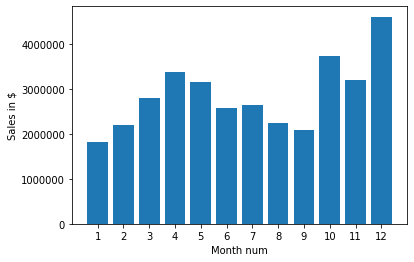

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline
months = range(1, 13)
plt.bar(months, best['Sales'])
plt.xticks(months)
plt.ylabel('Sales in $')
plt.xlabel('Month num')
plt.show()

#### What city had the highest number of sales?

In [192]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,23.90,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,99.99,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600.00,04/12/19 14:38,600.00,"669 Spruce St, Los Angeles, CA 90001",04


In [232]:
temp = [i.split(',')[1].strip() for i in df['Purchase Address']]
df['City'] = temp

In [240]:
citywise = df.groupby('City').sum().reset_index()
citywise.sort_values('Sales', ascending=False, inplace=True)

In [242]:
citywise.reset_index(drop=True, inplace=True)

In [243]:
citywise

,City,Quantity Ordered,Price Each,Sales
0,San Francisco,50237,8.209758e+06,8.260500e+06
1,Los Angeles,33288,5.421045e+06,5.452181e+06
2,New York City,27931,4.634771e+06,4.663717e+06
3,Boston,22528,3.637410e+06,3.661642e+06
4,Atlanta,16602,2.779908e+06,2.795499e+06
5,Dallas,16728,2.752524e+06,2.767872e+06
6,Seattle,16552,2.732996e+06,2.747455e+06
7,Portland,14052,2.307733e+06,2.320476e+06
8,Austin,11148,1.809835e+06,1.819519e+06


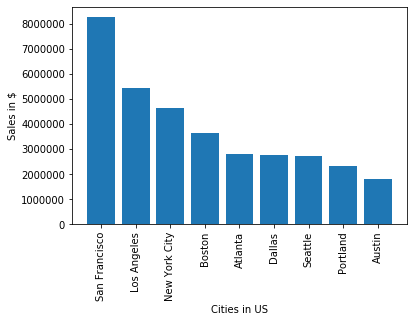

In [246]:
plt.bar(citywise['City'], citywise['Sales'])
plt.xlabel('Cities in US')
plt.ylabel('Sales in $')
plt.xticks(rotation=90)
plt.show()

#### What products are most often sold together?

In [247]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,23.90,"917 1st St, Dallas, TX 75001",04,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,99.99,"682 Chestnut St, Boston, MA 02215",04,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,600.00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,11.99,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,11.99,"333 8th St, Los Angeles, CA 90001",04,Los Angeles
